In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_num = pd.read_csv('../df_num.csv', index_col=0)#uniqe provider 5410

In [2]:
df_num

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,2,1,1,36000,3204,60,70,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,2,2,1,1,5000,1068,250,320,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,2,1,2,2,2,21260,2136,120,100,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,...,1,2,2,1,2,0,0,5470,1870,No
558207,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaN,...,1,2,2,1,2,0,0,5470,1870,No
558208,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,...,1,2,2,1,2,0,0,5470,1870,No
558209,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,1,2,2,1,2,0,0,5470,1870,No


# Claims_number

In [4]:
df_claim=df_num.groupby('Provider')[['ClaimID']].count().reset_index()

In [5]:
df_claim

,Provider,ClaimID
0,PRV51001,25
1,PRV51003,132
2,PRV51004,149
3,PRV51005,1165
4,PRV51007,72
...,...,...
5405,PRV57759,28
5406,PRV57760,22
5407,PRV57761,82
5408,PRV57762,1


# Claim_Period

In [7]:
df_num['Claim_Period']=(pd.to_datetime(df_num.ClaimEndDt)-pd.to_datetime(df_num.ClaimStartDt)).dt.days+1

In [8]:
df_Claim_Period=df_num[['Provider','Claim_Period']].groupby('Provider').count().reset_index()

In [9]:
df_Claim_Period

,Provider,Claim_Period
0,PRV51001,25
1,PRV51003,132
2,PRV51004,149
3,PRV51005,1165
4,PRV51007,72
...,...,...
5405,PRV57759,28
5406,PRV57760,22
5407,PRV57761,82
5408,PRV57762,1


# Gender

In [10]:
df_num['Gender']

0         1
1         1
2         1
3         2
4         2
         ..
558206    2
558207    2
558208    2
558209    2
558210    2
Name: Gender, Length: 558211, dtype: int64

In [11]:
df_Gender=df_num[['Provider','Gender']][df_num['Gender']==1].groupby('Provider').count()/df_num[['Provider','Gender']].groupby('Provider').count()

In [64]:
df_Gender.reset_index(inplace=True)

In [65]:
df_Gender.fillna(0,inplace=True)

In [66]:
df_Gender.isnull().sum()

index       0
Provider    0
Gender      0
dtype: int64

In [ ]:
#test of individual provider 

df_num[['Provider','Gender']][df_num["Provider"]=='PRV51005'].groupby('Provider').count()

In [ ]:
#test
df_num[['Provider','Gender']][(df_num["Provider"]=='PRV51005') & (df_num['Gender']==1 ) ].groupby('Provider').count()

In [ ]:
#test
df_num[['Provider','Gender']][(df_num["Provider"]=='PRV51005') & (df_num['Gender']==2 ) ].groupby('Provider').count()

# Race

In [14]:
df_num[['Race']].value_counts()

Race
1       471036
2        55640
3        19715
5        11820
dtype: int64

In [15]:
df_Race1=df_num[['Provider','Race']][df_num['Race']==1].groupby('Provider').count().reset_index()

In [16]:
df_Race1.rename(columns = {'Race':1}, inplace = True)

In [55]:
df_Race1

,Provider,1
0,PRV51001,21
1,PRV51003,107
2,PRV51004,120
3,PRV51005,893
4,PRV51007,58
...,...,...
5363,PRV57759,22
5364,PRV57760,18
5365,PRV57761,70
5366,PRV57762,1


In [18]:
two=df_num[['Provider','Race']][df_num['Race']==2].groupby('Provider').count().reset_index()
two.rename(columns = {'Race':2}, inplace = True)
three=df_num[['Provider','Race']][df_num['Race']==3].groupby('Provider').count().reset_index()
three.rename(columns = {'Race':3}, inplace = True)
five=df_num[['Provider','Race']][df_num['Race']==5].groupby('Provider').count().reset_index()
five.rename(columns = {'Race':5}, inplace = True)

In [19]:
df_Race_merged=df_Gender[['Provider']].merge(df_Race1,on='Provider', how='left').merge(two,on='Provider', how='left').merge(three,on='Provider', how='left').merge(five,on='Provider', how='left')

In [20]:
df_Race_merged.fillna(0,inplace=True)

In [21]:
df_Race_merged

,Provider,1,2,3,5
0,PRV51001,21.0,4.0,0.0,0.0
1,PRV51003,107.0,24.0,0.0,1.0
2,PRV51004,120.0,24.0,5.0,0.0
3,PRV51005,893.0,262.0,10.0,0.0
4,PRV51007,58.0,14.0,0.0,0.0
...,...,...,...,...,...
5405,PRV57759,22.0,2.0,0.0,4.0
5406,PRV57760,18.0,4.0,0.0,0.0
5407,PRV57761,70.0,7.0,1.0,4.0
5408,PRV57762,1.0,0.0,0.0,0.0


In [22]:
#test
df_num[['Provider','Race']][df_num['Provider']=='PRV56179']['Race'].value_counts()

1    3
5    2
2    2
3    1
Name: Race, dtype: int64

In [23]:
df_num[['Provider','Race']][df_num['Provider']=='PRV51140']['Race'].value_counts()

1    437
3     31
2     10
5      9
Name: Race, dtype: int64

In [24]:
df_Race_merged['Racemajor']=df_Race_merged[[1,2,3,5]].idxmax(axis=1,skipna=True)

In [25]:
df_Race_merged['Racemajor'].value_counts()# most of the major races are 1. Highly imbalanced.

1    5330
2      51
3      24
5       5
Name: Racemajor, dtype: int64

In [26]:
df_Race_merged[[1,2,3,5]].sum(axis=1,skipna=True)

0         25.0
1        132.0
2        149.0
3       1165.0
4         72.0
         ...  
5405      28.0
5406      22.0
5407      82.0
5408       1.0
5409     118.0
Length: 5410, dtype: float64

In [27]:
df_Race_merged['Race1_percent']=df_Race_merged[1]/df_Race_merged[[1,2,3,5]].sum(axis=1,skipna=True)

In [28]:
df_Race_merged

,Provider,1,2,3,5,Racemajor,Race1_percent
0,PRV51001,21.0,4.0,0.0,0.0,1,0.840000
1,PRV51003,107.0,24.0,0.0,1.0,1,0.810606
2,PRV51004,120.0,24.0,5.0,0.0,1,0.805369
3,PRV51005,893.0,262.0,10.0,0.0,1,0.766524
4,PRV51007,58.0,14.0,0.0,0.0,1,0.805556
...,...,...,...,...,...,...,...
5405,PRV57759,22.0,2.0,0.0,4.0,1,0.785714
5406,PRV57760,18.0,4.0,0.0,0.0,1,0.818182
5407,PRV57761,70.0,7.0,1.0,4.0,1,0.853659
5408,PRV57762,1.0,0.0,0.0,0.0,1,1.000000


In [29]:
df_Race_merged.isna().sum()

Provider         0
1                0
2                0
3                0
5                0
Racemajor        0
Race1_percent    0
dtype: int64

<AxesSubplot:>

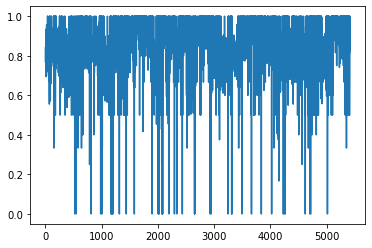

In [30]:
df_Race_merged['Race1_percent'].plot()

In [31]:
df_Race_merged['Race1_percent'].max()

1.0

In [32]:
df_Race_merged['Race1_percent'].min()

0.0

In [33]:
df_Race=df_Race_merged[['Provider','Race1_percent','Racemajor']]

In [34]:
df_Race

,Provider,Race1_percent,Racemajor
0,PRV51001,0.840000,1
1,PRV51003,0.810606,1
2,PRV51004,0.805369,1
3,PRV51005,0.766524,1
4,PRV51007,0.805556,1
...,...,...,...
5405,PRV57759,0.785714,1
5406,PRV57760,0.818182,1
5407,PRV57761,0.853659,1
5408,PRV57762,1.000000,1


# RenalDiseaseIndicator

In [35]:
df_num[['RenalDiseaseIndicator']].value_counts()

RenalDiseaseIndicator
0                        448363
Y                        109848
dtype: int64

In [36]:
renal=df_num[['Provider','RenalDiseaseIndicator']][df_num['RenalDiseaseIndicator']=='Y'].groupby('Provider').count()

In [37]:
total_renal=df_num[['Provider','RenalDiseaseIndicator']].groupby('Provider').count()

In [38]:
df_Renal=renal/total_renal

In [39]:
df_Renal.reset_index(inplace=True)


,Provider,RenalDiseaseIndicator
0,PRV51001,0.320000
1,PRV51003,0.219697
2,PRV51004,0.154362
3,PRV51005,0.222318
4,PRV51007,0.152778
...,...,...
5405,PRV57759,0.178571
5406,PRV57760,NaN
5407,PRV57761,0.280488
5408,PRV57762,NaN


In [68]:
df_Renal.fillna(0,inplace=True)

In [40]:
#test
df_num[['Provider','RenalDiseaseIndicator']][(df_num["Provider"]=='PRV51005') & (df_num['RenalDiseaseIndicator']=='Y') ].groupby('Provider').count()

,RenalDiseaseIndicator
Provider,
PRV51005,259


In [41]:
#test
df_num[['Provider','RenalDiseaseIndicator']][df_num["Provider"]=='PRV51005'].groupby('Provider').count()

,RenalDiseaseIndicator
Provider,
PRV51005,1165


# Age

In [42]:
df_num['Age']=((pd.to_datetime(df_num.ClaimStartDt)-pd.to_datetime(df_num.DOB)).dt.days//365)


In [43]:
df_Age=df_num[['Provider','Age']].groupby('Provider').median()
df_Age.reset_index(inplace=True)

In [44]:
#test
df_num[['Provider','Age']][df_num["Provider"]=='PRV51005'].sum()

Provider    PRV51005PRV51005PRV51005PRV51005PRV51005PRV510...
Age                                                     81046
dtype: object

In [45]:
df_Age

,Provider,Age
0,PRV51001,79.0
1,PRV51003,71.0
2,PRV51004,72.0
3,PRV51005,70.0
4,PRV51007,69.5
...,...,...
5405,PRV57759,72.5
5406,PRV57760,58.0
5407,PRV57761,73.0
5408,PRV57762,67.0


# Merge

In [69]:
df_merged=df_claim.merge(df_Gender,on='Provider').merge(df_Claim_Period,on='Provider').merge(df_Race,on='Provider').merge(df_Renal,on='Provider').merge(df_Age,on='Provider') 

In [70]:
df_merged.round(3)

,Provider,ClaimID,index,Gender,Claim_Period,Race1_percent,Racemajor,RenalDiseaseIndicator,Age
0,PRV51001,25,0,0.360,25,0.840,1,0.320,79.0
1,PRV51003,132,1,0.409,132,0.811,1,0.220,71.0
2,PRV51004,149,2,0.309,149,0.805,1,0.154,72.0
3,PRV51005,1165,3,0.439,1165,0.767,1,0.222,70.0
4,PRV51007,72,4,0.472,72,0.806,1,0.153,69.5
...,...,...,...,...,...,...,...,...,...
5405,PRV57759,28,5405,0.571,28,0.786,1,0.179,72.5
5406,PRV57760,22,5406,0.773,22,0.818,1,0.000,58.0
5407,PRV57761,82,5407,0.488,82,0.854,1,0.280,73.0
5408,PRV57762,1,5408,1.000,1,1.000,1,0.000,67.0


In [71]:
df_merged.round(3).to_csv('./Feature_Xin.csv') 

In [72]:
df_Race.round(3).to_csv('./Race.csv') 

In [73]:
df_Gender.round(3).to_csv('./Gender.csv') 

In [74]:
df_Claim_Period.round(3).to_csv('./Claim_Period.csv') 

In [75]:
df_claim.round(3).to_csv('./Claim.csv') 

In [76]:
df_Renal.round(3).to_csv('./Renal.csv') 

In [77]:
df_Race_merged.round(3).to_csv('./df_Race_merged.csv')

In [79]:
df_merged.isnull().sum()

Provider                 0
ClaimID                  0
index                    0
Gender                   0
Claim_Period             0
Race1_percent            0
Racemajor                0
RenalDiseaseIndicator    0
Age                      0
dtype: int64